In [3]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import sklearn.linear_model
import scipy.stats

# Practical exercise for Example Sheet 3

## Loading the dataset

In [ ]:
# Load the dataset
url = 'https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/climate.csv'
climate = pandas.read_csv(url)
climate = climate.loc[(climate.station=='Cambridge') & (climate.yyyy>=1985)].copy()
t = climate.yyyy + (climate.mm-1)/12
temp = (climate.tmin + climate.tmax)/2

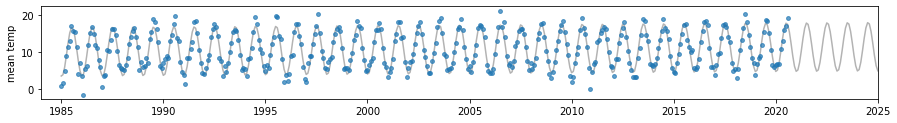

In [17]:
# Fit a simple model, and plot it

π = np.pi
X = np.column_stack([np.sin(2*π*t), np.cos(2*π*t), t-2000])
model = sklearn.linear_model.LinearRegression()
model.fit(X, temp)

tnew = np.linspace(1985, 2025, (2025-1985)*12+1)
Xnew = np.column_stack([np.sin(2*π*tnew), np.cos(2*π*tnew), tnew-2000])
tempnew = model.predict(Xnew)

fig,ax = plt.subplots(figsize=(15,1.7))
ax.plot(tnew, tempnew, color='0.7', zorder=1)
ax.scatter(t, temp, s=15, alpha=0.7, zorder=2)
ax.set_xlim([1984, 2025])
ax.set_ylabel('mean temp')
plt.show()

## Question: confidence interval for a model with linearly increasing temperature

We're asked for a 95% confidence interval for $\hat{\gamma}$, for the probability model
$$
\texttt{temp} = \alpha + \beta_1 \sin(2\pi\texttt{t}) + \beta_2 \cos(2\pi\texttt{t}) + \gamma(\texttt{t}-2000) + N(0,\sigma^2).
$$

In [ ]:
# Step 1.
# Define a readout function that accepts a dataset and returns the statistic of interest.

def γhat(temp):
    # Fit the model. Use the t values from the original climate dataset,
    # and assume that temp contains a new vector of temperature readings that matches the times t
    # in the dataset.
    # Return the γ coefficient from the fitted model.
    return ???

In [ ]:
# Step 2.
# Define a function to generate a synthetic copy of the dataset, using parametric resampling.

def rtemp():
    pred = ???
    σhat = ???
    return np.random.normal(loc=pred, scale=σhat)

In [ ]:
# Step 3.
# Sample the readout statistic, and report its spread

γhat_ = [γhat(rtemp()) for _ in range(10000)]
lo,hi = np.quantile(γhat_, [.025,.975])

fig,ax = plt.subplots(figsize=(4.5,1.5))
ax.hist(γhat_, bins=30)
ax.axvline(lo, color='black', linestyle='dotted')
ax.axvline(hi, color='black', linestyle='dotted')
plt.show()

## Question: confidence interval and hypothesis test for a model with step-function temperature

We're asked for a 95% confidence interval for $\hat{\gamma}_{2010}-\hat{\gamma}_{1980}$, for the probability model
$$
\texttt{temp} = \beta_1 \sin(2\pi\texttt{t}) + \beta_2 \cos(2\pi\texttt{t}) + \gamma_{\text{decade}} + N(0,\sigma^2).
$$

We're also asked for a hypothesis test of $H_0$: $\gamma_{2010}=\gamma_{1980}$.

In [8]:
# Here's code to fit the model, and to extract the γ coefficients

π = np.pi
decade = np.floor(t/10).astype(int) * 10
decades = list(np.sort(np.unique(decade)))
X = np.column_stack([np.where(decade==d,1,0) for d in decades] + [np.sin(2*π*t), np.cos(2*π*t)])

model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X, temp)
γhat = [model.coef_[decades.index(d)] for d in decades]
pandas.Series(γhat, index=decades)

1980     9.746667
1990    10.481250
2000    10.902917
2010    10.815833
2020    11.712371
dtype: float64

In [ ]:
# CONFIDENCE INTERVAL

# Step 1. Define a readout function
def Δ(temp): return ???

# Step 2. To generate a synthetic dataset ...
def rtemp(): 
    pred = ???
    σhat = ???
    return np.random.normal(loc=pred, scale=σhat)

# Step 3. Sample the readout statistic, report a confidence interval
Δ_ = np.array([Δ(rtemp()) for _ in range(10000)])
lo,hi = np.quantile(Δ_, [.025,.975])

In [ ]:
# HYPOTHESIS TEST

# Step 1. Define a test statistic
# (A good choice is Δ defined above)

# Step 2. To generate a synthetic dataset, assuming H0 is true
def rtemp0():
    pred = ???
    σhat = ???
    return np.random.normal(loc=pred, scale=σhat)

# Step 3. Sample the test statistic, report p-value
Δ0_ = np.array([Δ(rtemp0()) for _ in range(10000)])
# Do you want a two-sided test? If so,
p = 2 * min(np.mean(Δ0_>=Δ(temp)), np.mean(Δ0_<=Δ(temp)))
# Or maybe a one-sided test? If so, which side?
p = np.mean(Δ0_ >= Δ(temp))
p = np.mean(Δ0_ <= Δ(temp))

In [ ]:
# This code plots a histogram of Δ_ annotated with a two-sided
# confidence interval (using lo,hi computed earlier),
# and also a histogram of Δ0_ annotated with a two-sided 
# hypothesis test (using p computed earlier).

fig,(ax1,ax2) = plt.subplots(2,1, figsize=(4.5,3), sharex=True)
b = np.linspace(-1.2,1.7,60)

# Depict a two-sided confidence interval
ax1.hist(Δ_, bins=b, alpha=.8)
ax1.hist(Δ_[(Δ_>lo) & (Δ_<hi)], bins=b, color='red')
ax1.axvline(lo, color='black', linestyle='dashed')
ax1.axvline(hi, color='black', linestyle='dashed')
ax1.axvline(Δ(temp), color='black')

# Depict a two-sided hypothesis test.
# This code assumes that the observed test statistic is on the right hand tail,
# and finds an equally-extreme point u on the left hand tail.
ax2.hist(Δ0_, bins=b, alpha=.8)
u = np.sort(Δ0_)[round((p/2)*len(Δ0_))]
ax2.hist(Δ0_[Δ0_>Δ(temp)], bins=b, color='red')
ax2.hist(Δ0_[Δ0_<u], bins=b, color='red')
ax2.axvline(Δ(temp), color='black')
ax2.axvline(u, color='black', linestyle='dotted')

# Labels
ax1.set_title(f'confidence interval [{lo:.3},{hi:.3}]')
ax2.set_title(f'hypothesis test $p={p:.5}$')
ax2.set_xlabel(r'$\hat{\gamma}_{{2010}}-\hat{\gamma}_{{1980}}$ [°C]')
plt.show()

## Supplementary question: confidence interval for predictions

We can make predictions for future timepoints by just plugging in our estimated parameters, as described in section 2.1.

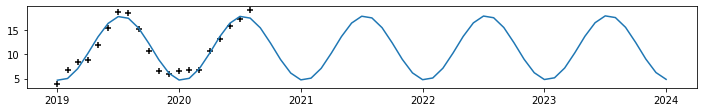

In [14]:
π = np.pi
X = np.column_stack([np.sin(2*π*t), np.cos(2*π*t), t-2000])
model = sklearn.linear_model.LinearRegression()
model.fit(X, temp)

# Method 1 for predictions
def pred(tnew):
    Xnew = np.column_stack([np.sin(2*π*tnew), np.cos(2*π*tnew), tnew-2000])
    return model.predict(Xnew)

# Method 2 for predictions
αhat, (β1hat, β2hat, γhat) = model.intercept_, model.coef_
def pred(tnew):
    return αhat + β1hat*np.sin(2*π*tnew) + β2hat*np.cos(2*π*tnew) + γhat*(tnew-2000)


tnew = np.linspace(2019,2024, 5*12+1)

fig,ax = plt.subplots(figsize=(12,1.5))
ax.plot(tnew, pred(tnew))
ax.scatter(t[t>=min(tnew)], temp[t>=min(tnew)], color='black', marker='+')
plt.show()

In [ ]:
tnew = np.linspace(2019,2024, 5*12+1)

# Compute the predicted temperature at each timepoint.
# Also, compute a 95% confidence interval.
# Let lo and hi be arrays, the same size as tnew.
tempnew = pred(tnew)
lo = ???
hi = ???

fig,ax = plt.subplots(figsize=(12,1.5))
ax.plot(tnew, tempnew, color='black')
ax.fill_between(tnew, lo, hi, color='0.85')
ax.scatter(t[t>=min(tnew)], temp[t>=min(tnew)], color='black', marker='+')
plt.show()